In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
import seaborn as sns
import warnings
from tqdm import tqdm
import os
import pickle 
warnings.filterwarnings('ignore')

In [2]:
path = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'

images_name = []
label_name = []

for i in tqdm(os.listdir(path)):
    new_path = os.path.join(path,i)
    for j in os.listdir(new_path):
        fil_path = os.path.join(new_path,j)
        images_name.append(fil_path)
        label_name.append(i)

100%|██████████| 29/29 [00:10<00:00,  2.79it/s]


Text(0.5, 1.0, 'N')

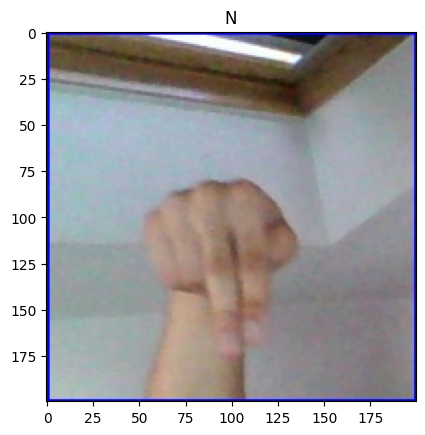

In [3]:
plt.imshow(imd.imread(images_name[0]))
plt.title(label_name[0])

In [4]:
train_data = pd.DataFrame({
    'image_name': images_name,
    'label': label_name
})
train_data.head()

,image_name,label
0,/kaggle/input/asl-alphabet/asl_alphabet_train/...,N
1,/kaggle/input/asl-alphabet/asl_alphabet_train/...,N
2,/kaggle/input/asl-alphabet/asl_alphabet_train/...,N
3,/kaggle/input/asl-alphabet/asl_alphabet_train/...,N
4,/kaggle/input/asl-alphabet/asl_alphabet_train/...,N


In [5]:
path = '/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

images_name = []
label_name = []

for i in tqdm(os.listdir(path)):
    fil_path = os.path.join(path,i)
    images_name.append(fil_path)
    label_name.append(i[0])

100%|██████████| 28/28 [00:00<00:00, 155756.65it/s]


In [6]:
test_data = pd.DataFrame({
    'image_name': images_name,
    'label': label_name
})
test_data.head()

,image_name,label
0,/kaggle/input/asl-alphabet/asl_alphabet_test/a...,A
1,/kaggle/input/asl-alphabet/asl_alphabet_test/a...,E
2,/kaggle/input/asl-alphabet/asl_alphabet_test/a...,L
3,/kaggle/input/asl-alphabet/asl_alphabet_test/a...,N
4,/kaggle/input/asl-alphabet/asl_alphabet_test/a...,S


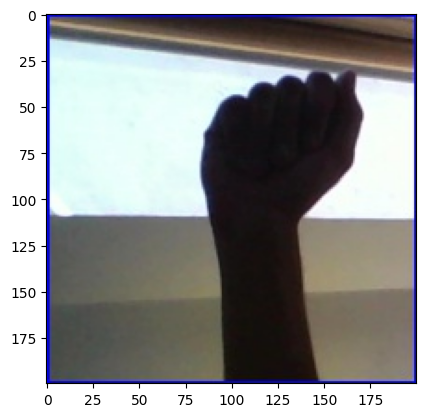

In [7]:
plt.imshow(imd.imread(test_data['image_name'][0]))


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

image_size = (128, 128)
batch_size = 32

train_gen = datagen.flow_from_dataframe(
    dataframe=train_data,             
    x_col='image_name',       
    y_col='label',            
    target_size=image_size,    
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=True
)

Found 87000 validated image filenames belonging to 29 classes.


In [9]:
image_size = (128, 128)
batch_size = 32

test_gen = datagen.flow_from_dataframe(
    dataframe=test_data,             
    x_col='image_name',       
    y_col='label',            
    target_size=image_size,    
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=True
)

Found 28 validated image filenames belonging to 28 classes.


In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),

    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(29,activation='softmax'),
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 29)             │         1,885 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 472,221 (1.80 MB)

 Trainable params: 472,221 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
callback = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)


In [14]:
history = model.fit(
    train_gen,
    epochs=10,  
    verbose=1,
    callbacks = [callback]
)

Epoch 1/10


I0000 00:00:1727970316.421518      72 service.cc:145] XLA service 0x5c14aea5c900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727970316.421572      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727970316.421576      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/2719 ━━━━━━━━━━━━━━━━━━━━ 7:22:01 10s/step - accuracy: 0.0625 - loss: 3.3338

I0000 00:00:1727970322.877784      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2719/2719 ━━━━━━━━━━━━━━━━━━━━ 476s 171ms/step - accuracy: 0.1702 - loss: 2.8018
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 142s 52ms/step - accuracy: 0.7543 - loss: 0.6783
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 126s 46ms/step - accuracy: 0.8771 - loss: 0.3557
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 129s 47ms/step - accuracy: 0.9169 - loss: 0.2516
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 128s 47ms/step - accuracy: 0.9377 - loss: 0.1898
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 142s 47ms/step - accuracy: 0.9478 - loss: 0.1631
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 125s 46ms/step - accuracy: 0.9557 - loss: 0.1436
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 127s 47ms/step - accuracy: 0.9622 - loss: 0.1238
Epoch 9/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 154s 51ms/step - accuracy: 0.9647 - loss: 0.1171
Epoch 10/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 130s 48ms/step - accuracy: 0.9673 - loss: 0.1091


In [15]:
model.save('model.h5')

KeyError: 'val_accuracy'

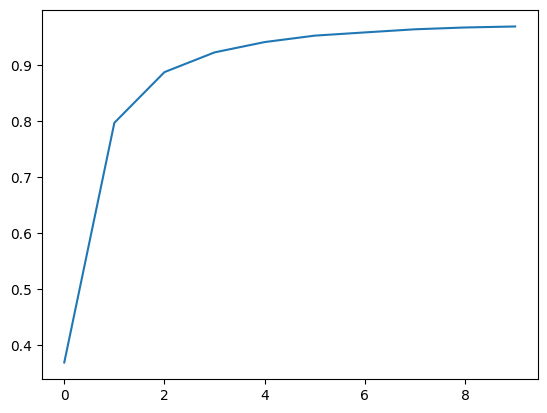

In [16]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#